<a href="https://colab.research.google.com/github/tamaravera14/INVESTIGACION_DE_OPERACIONES/blob/main/PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **PERT/CPM**

---

1. *Bazaldua Vera Tamara Alheli.*
2. *Juárez Parangueo Edgar Daniel.*

---

**Fabricación de Atorvastatina**

La empresa farmacéutica Landsteiner S.A. está planificando la producción de su  medicamento llamado Atorvastatina (Bacat). Para garantizar la eficiencia y el cumplimiento de plazos, se desea programar y analizar todas las actividades involucradas en la fabricación y acondicionamiento del medicamento, desde la recepción de materias primas hasta el envío a los centros de distribución, la duración del proyecto esta estimada en 32 semanas con un presupuesto de $2,000,000.

El proceso de producción nos muestra las siguientes etapas:

**A.** Recepción y preparación de materias primas: Inspección y almacenamiento de ingredientes activos y excipientes.

**B.** Mezcla y formulación inicial: Combinación de componentes según la fórmula establecida.

**C.** Granulación del compuesto: Transformación de la mezcla en partículas de tamaño adecuado.

**D.** Secado del granulado: Eliminación de humedad para garantizar la estabilidad del producto.

**E.** Compresión y formado de tabletas: Moldeo de las tabletas con la dosis establecida.

**F.** Recubrimiento de tabletas: Aplicación de una capa protectora sobre las tabletas.

**G.** Control de calidad intermedio: Análisis físico-químicos y microbiológicos para asegurar la calidad del producto.

**H.** Acondicionamiento primario (blíster): Empaque individual de las tabletas.

**I.** Acondicionamiento secundario (cajas): Colocación de los blísteres en cajas para su distribución.

**J.** Etiquetado: Aplicación de etiquetas con información del producto.

**K.** Liberación final por control de calidad: Revisión y aprobación final del producto.

**L.** Empaque para distribución: Preparación para el envío a los centros de distribución.

**M.** Envío a centros de distribución: Transporte del producto a los puntos de venta.



Metodología a ejecutar:

* Método PERT/CPM: Para la planificación y control del proyecto.

* Software de modelado de redes: Para la representación gráfica del proceso.

* Cálculos de tiempos: Para determinar los tiempos de inicio y finalización de cada actividad.

Resultados Esperados:

* Diagrama de red: Representación visual del flujo de actividades.

* Tabla de tiempos: Detalle de los tiempos de inicio, finalización y holgura de cada actividad.

* Identificación de la ruta crítica: Actividades que determinan la duración total del proyecto.

---

#**Desarrollo con el uso de Python:**

---

Usamos las librerias que usaremos durante el desarrollo del proyecto:

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

Definimos las actividades a ejecutar durante las semanas
Utilizamos el modelo PERT/CPM:
- PERT: gestión de proyectos con tiempos inciertos (probabilístico).
- CPM: gestión de proyectos con tiempos fijos (determinístico)

Utilizamos los siguientes conceptos:

* Dur = duración de la actividad.
* Pre = predecesor
* ES (Early Start) = inicio más temprano.
* EF (Early Finish) = fin más temprano.
* LS (Late Start) = inicio más tardío permitido sin retrasar el proyecto.
* LF (Late Finish) = fin más tardío permitido.
* Slack (holgura) = diferencia LS − ES (cuánto puede retrasarse sin afectar el proyecto).
* Crítico = si Slack = 0, la actividad está en la ruta crítica.

 -------------------------------
# Definición de actividades PERT/CPM
-------------------------------

In [4]:
actividades = {
    "A": {"desc": "Recepción y preparación de materias primas", "pre": [], "dur": 2},
    "B": {"desc": "Mezcla y formulación inicial", "pre": ["A"], "dur": 4},
    "C": {"desc": "Granulación del compuesto", "pre": ["B"], "dur": 3},
    "D": {"desc": "Secado del granulado", "pre": ["C"], "dur": 2},
    "E": {"desc": "Compresión y formado de tabletas", "pre": ["D"], "dur": 5},
    "F": {"desc": "Recubrimiento de tabletas", "pre": ["E"], "dur": 4},
    "G": {"desc": "Análisis de control de calidad intermedio", "pre": ["B"], "dur": 3},
    "H": {"desc": "Validación microbiológica", "pre": ["G"], "dur": 6},
    "I": {"desc": "Acondicionamiento primario (blíster)", "pre": ["F","H"], "dur": 5},
    "J": {"desc": "Etiquetado", "pre": ["I"], "dur": 2},
    "K": {"desc": "Acondicionamiento secundario (cajas)", "pre": ["J"], "dur": 2},
    "L": {"desc": "Liberación final por control de calidad", "pre": ["I","K"], "dur": 4},
    "M": {"desc": "Empaque para distribución", "pre": ["L"], "dur": 2},
    "N": {"desc": "Envío a centros de distribución", "pre": ["M"], "dur": 1},
}

-------------------------------
# Crear grafo
-------------------------------

In [11]:
G = nx.DiGraph()
# Nodo de inicio
G.add_node("INICIO", desc="Inicio del proyecto", dur=0)

for act, info in actividades.items():
    G.add_node(act, desc=info["desc"], dur=info["dur"])
    if not info["pre"]:
        G.add_edge("INICIO", act)
    for pre in info["pre"]:
        G.add_edge(pre, act)

-------------------------------
# CPM: cálculo de ES, EF, LS, LF, Slack
-------------------------------

In [12]:
topo = list(nx.topological_sort(G))

ES, EF = {}, {}
for node in topo:
    if list(G.predecessors(node)):
        ES[node] = max(EF[p] for p in G.predecessors(node))
    else:
        ES[node] = 0
    EF[node] = ES[node] + G.nodes[node]["dur"]

project_duration = max(EF.values())
LF, LS = {}, {}
for node in reversed(topo):
    if list(G.successors(node)):
        LF[node] = min(LS[s] for s in G.successors(node))
    else:
        LF[node] = project_duration
    LS[node] = LF[node] - G.nodes[node]["dur"]

Slack = {n: LS[n] - ES[n] for n in G.nodes()}
crit_path = nx.dag_longest_path(G, weight="dur")    # Esta línea calcula cuál es la secuencia de tareas que determina la duración mínima del proyecto completo.
crit_edges = list(zip(crit_path, crit_path[1:]))

-------------------------------
# Tabla CPM con columna de predecesores
-------------------------------

In [13]:
print("Resumen CPM en semanas\n")
print(f"Duración mínima del proyecto: {project_duration} semanas\n")
print("Nodo | Dur | ES | EF | LS | LF | Slack | Predecesores | Crítico")
print("-"*80)
for n in topo:
    crit = "Sí" if Slack[n] == 0 else ""
    # Excluimos INICIO como predecesor
    predecesores = ", ".join([p for p in G.predecessors(n) if p != "INICIO"])
    print(f"{n:4} | {G.nodes[n]['dur']:3} | {ES[n]:3} | {EF[n]:3} | {LS[n]:3} | {LF[n]:3} | {Slack[n]:5} | {predecesores:14} | {crit}")

print("\nRuta crítica:", " → ".join(crit_path))

Resumen CPM en semanas

Duración mínima del proyecto: 36 semanas

Nodo | Dur | ES | EF | LS | LF | Slack | Predecesores | Crítico
--------------------------------------------------------------------------------
INICIO |   0 |   0 |   0 |   0 |   0 |     0 |                | Sí
A    |   2 |   0 |   2 |   0 |   2 |     0 |                | Sí
B    |   4 |   2 |   6 |   2 |   6 |     0 | A              | Sí
C    |   3 |   6 |   9 |   6 |   9 |     0 | B              | Sí
G    |   3 |   6 |   9 |  11 |  14 |     5 | B              | 
D    |   2 |   9 |  11 |   9 |  11 |     0 | C              | Sí
H    |   6 |   9 |  15 |  14 |  20 |     5 | G              | 
E    |   5 |  11 |  16 |  11 |  16 |     0 | D              | Sí
F    |   4 |  16 |  20 |  16 |  20 |     0 | E              | Sí
I    |   5 |  20 |  25 |  20 |  25 |     0 | F, H           | Sí
J    |   2 |  25 |  27 |  25 |  27 |     0 | I              | Sí
K    |   2 |  27 |  29 |  27 |  29 |     0 | J              | Sí
L    |   4 

-------------------------------
# Grafo completo
-------------------------------

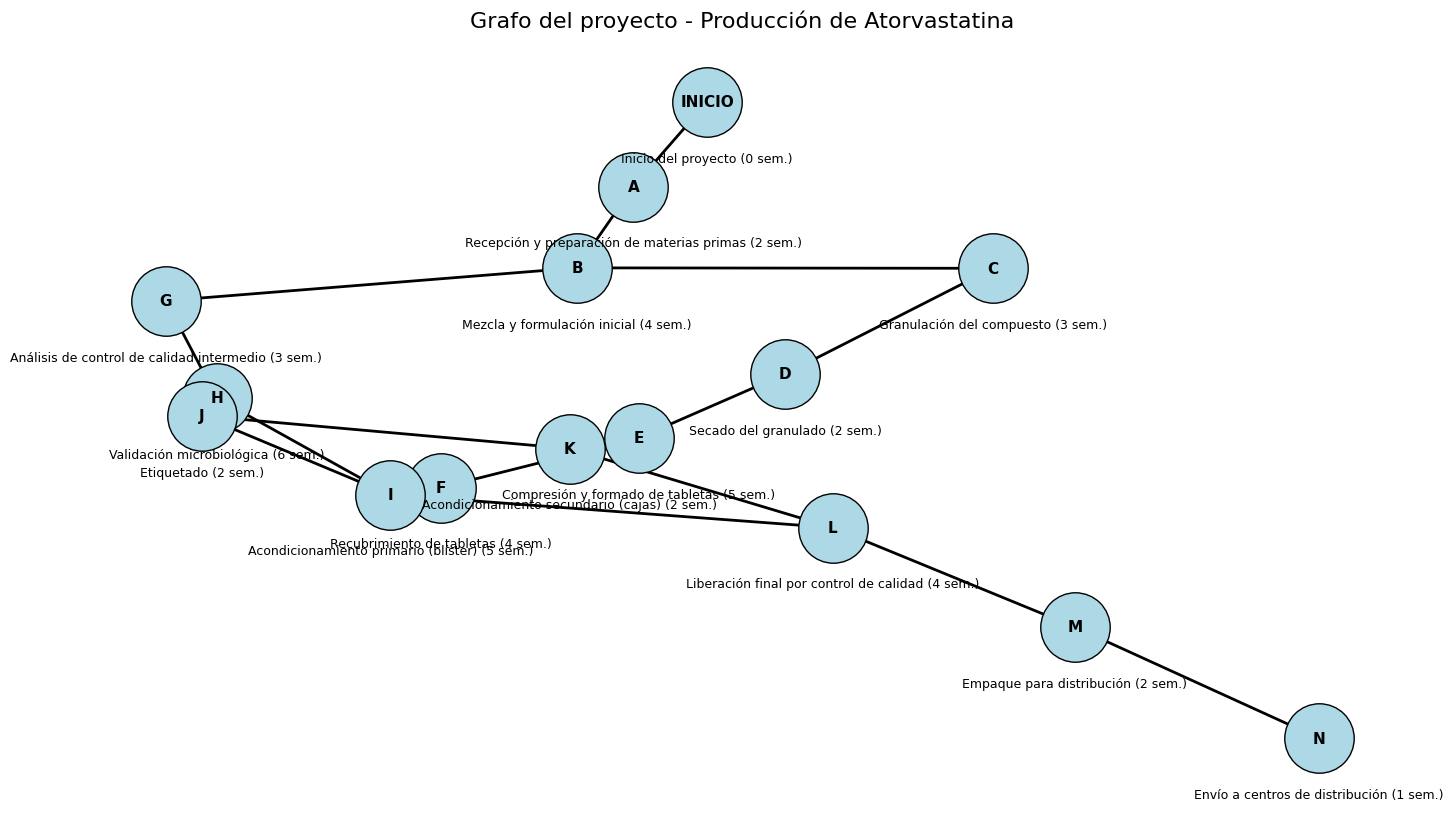

In [15]:
try:
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot", args="-Grankdir=LR")
except:
    pos = nx.spring_layout(G, seed=42)

# Grafo completo
plt.figure(figsize=(18,10))
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color="lightblue", edgecolors="k")
nx.draw_networkx_labels(G, pos, labels={n: n for n in G.nodes()}, font_size=11, font_weight="bold")
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="-|>", arrowsize=18, edge_color="black", width=2)
for n in G.nodes():
    x, y = pos[n]
    plt.text(x, y-0.15, f"{G.nodes[n]['desc']} ({G.nodes[n]['dur']} sem.)",
             fontsize=9, ha="center", va="top", wrap=True)
plt.title("Grafo del proyecto - Producción de Atorvastatina", fontsize=16)
plt.axis("off")
plt.show()

---

# Tabla de todas las trayectorias

---

In [9]:
G.add_node("TERMINACIÓN", desc="Fin del proyecto", dur=0)
for n in list(G.nodes()):
    if n not in ["TERMINACIÓN", "INICIO"] and len(list(G.successors(n))) == 0:
        G.add_edge(n, "TERMINACIÓN", weight=0)

all_paths = list(nx.all_simple_paths(G, source="INICIO", target="TERMINACIÓN"))

tabla = []
for path in all_paths:
    duracion = sum(G.nodes[n]["dur"] for n in path)
    tabla.append((path, duracion))

tabla = sorted(tabla, key=lambda x: x[1], reverse=True)

print("\nTabla de trayectorias y longitudes (Producción de fármaco)\n")
for path, dur in tabla:
    ruta = " → ".join(path)
    print(f"{ruta:<120} {dur} semanas")




Tabla de trayectorias y longitudes (Producción de fármaco)

INICIO → A → B → C → D → E → F → I → J → K → L → M → N → TERMINACIÓN                                                     36 semanas
INICIO → A → B → C → D → E → F → I → L → M → N → TERMINACIÓN                                                             32 semanas
INICIO → A → B → G → H → I → J → K → L → M → N → TERMINACIÓN                                                             31 semanas
INICIO → A → B → G → H → I → L → M → N → TERMINACIÓN                                                                     27 semanas


---

# Ruta crítica

---

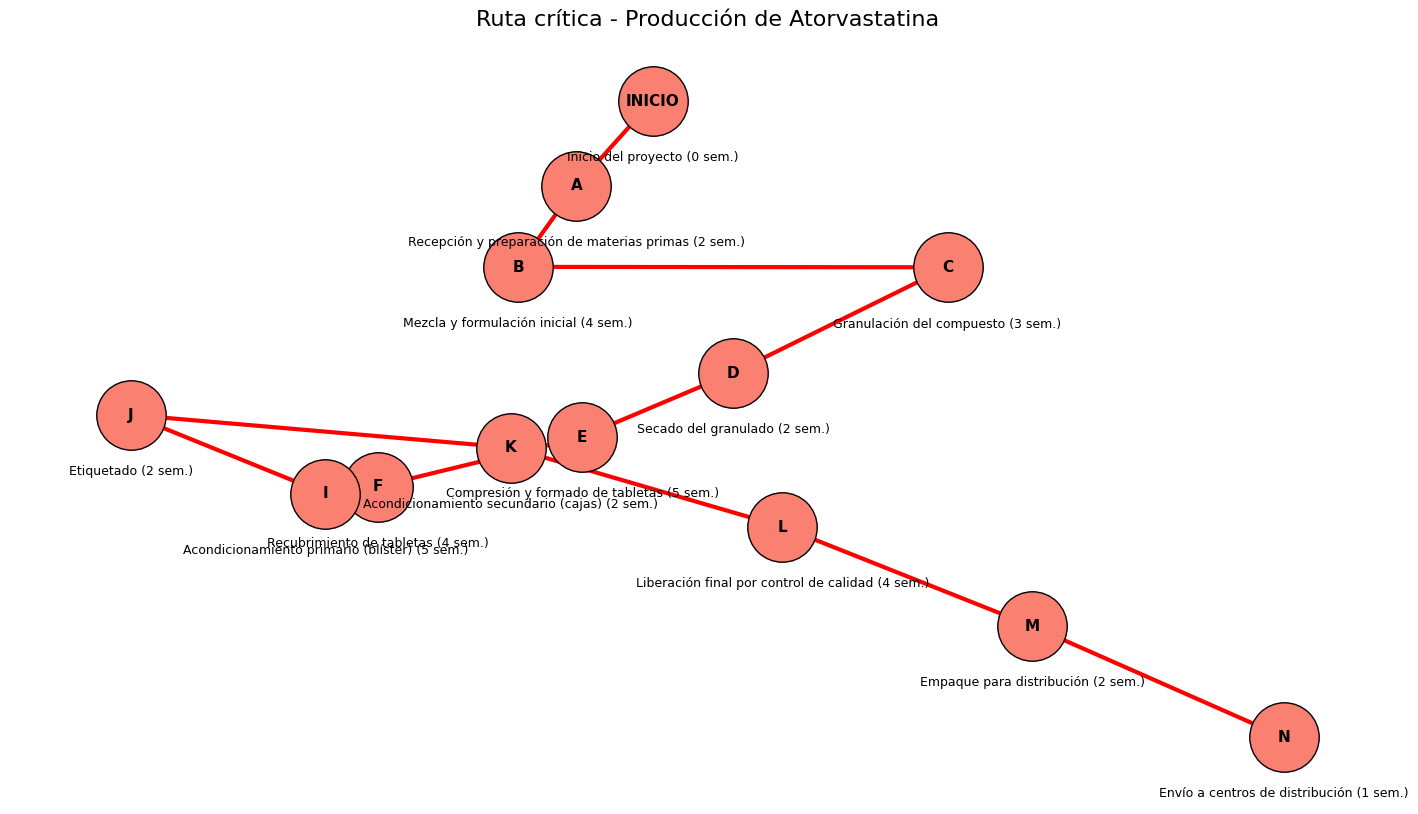

In [10]:
G_crit = G.subgraph(crit_path)
plt.figure(figsize=(18,10))
nx.draw_networkx_nodes(G_crit, pos, node_size=2500, node_color="salmon", edgecolors="k")
nx.draw_networkx_labels(G_crit, pos, labels={n: n for n in G_crit.nodes()}, font_size=11, font_weight="bold")
nx.draw_networkx_edges(G_crit, pos, edgelist=crit_edges, arrows=True, arrowstyle="-|>", arrowsize=20,
                       edge_color="red", width=3)
for n in G_crit.nodes():
    x, y = pos[n]
    plt.text(x, y-0.15, f"{G_crit.nodes[n]['desc']} ({G_crit.nodes[n]['dur']} sem.)",
             fontsize=9, ha="center", va="top", wrap=True)
plt.title("Ruta crítica - Producción de Atorvastatina", fontsize=16)
plt.axis("off")
plt.show()